In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns, ax=None):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    if not ax:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    print(sorted_anns)
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.4]])
        img[m] = color_mask
    ax.imshow(img)

In [3]:
def show_ann(ann, box, image):
    if len(ann) == 0:
        return
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    img = np.ones((image.shape[0], image.shape[1], 4))
    img[:,:,3] = 0

    m = ~ann['segmentation']
    m = np.pad(m, pad_width=((box[0],image.shape[0]-box[0]-m.shape[0]),(box[2],image.shape[1]-box[2]-m.shape[1])),mode='constant',constant_values=False)
    color_mask = np.concatenate([[255,0,0], [0.35]])
    img[m] = color_mask
    ax.imshow(img)

In [4]:
def crop_image(image, box):
    return image[box[0]:box[1], box[2]:box[3]]

In [5]:
image = cv2.imread("Images/color.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape
image = cv2.resize(image, (width//2, height//2))
height, width, _ = image.shape
box = [int(0*height), int(1*height), int(0*width), int(1*width)]
croped_image = crop_image(image,box)

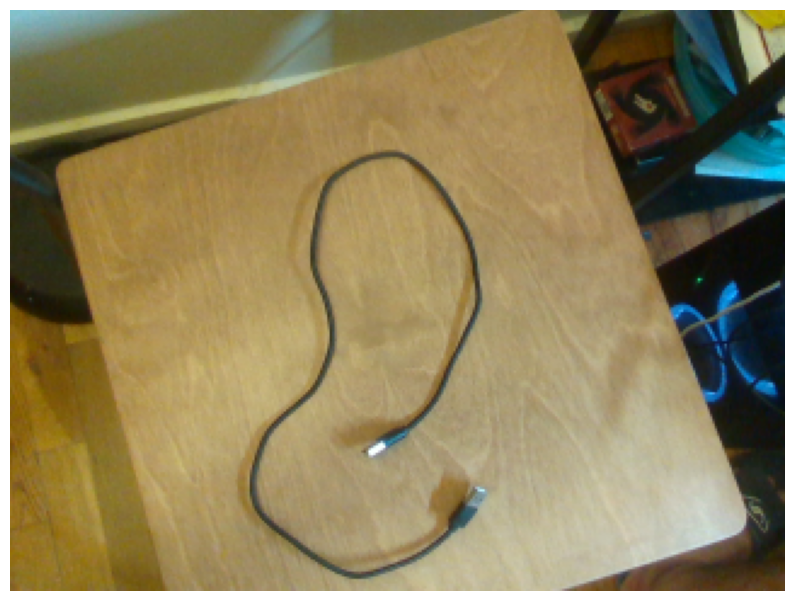

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
import sys
sys.path.append("../")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint_path = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint_path)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=16,
)

In [8]:
masks = mask_generator.generate(croped_image)

In [9]:
print(len(masks))
print(masks[0].keys())

36
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


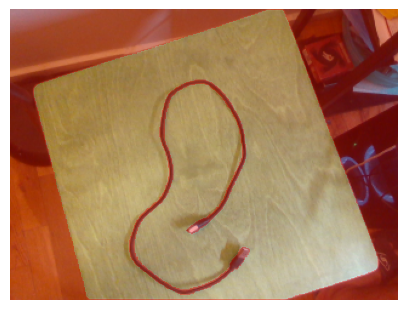

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(image)
sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=True)
show_ann(sorted_anns[0],box, image)
plt.axis('off')
plt.show() 


In [11]:
torch.cuda.empty_cache()